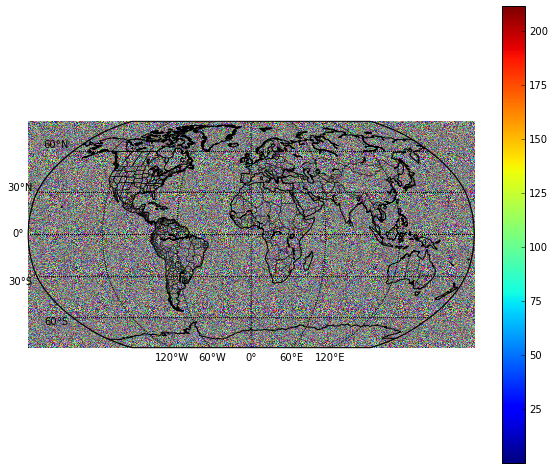

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np

fig = plt.figure(figsize=(10, 18))
ax1 = plt.subplot(211)
m = Basemap(projection='robin', lon_0=0., ax=ax1)

# Compute lats and lons arrays
lons = (-180. + np.arange(720) / 2.) + 0.25
lats = (-90. + np.arange(360) / 2.) + 0.25

nx = int((m.xmax - m.xmin) / 25000.) + 1
ny = int((m.ymax - m.ymin) / 25000.) + 1


allf = np.random.randn(360,720,4)
allf = np.abs(allf) / np.abs(allf).max() * 255
allf[:,:,3] = 0.0

waterf_rp = m.transform_scalar(allf[:, :, 0], lons, lats, nx, ny, masked=True)
radf_rp = m.transform_scalar(allf[:, :, 1], lons, lats, nx, ny, masked=True)
tempf_rp = m.transform_scalar(allf[:, :, 2], lons, lats, nx, ny, masked=True)



allf_rp = np.ma.dstack((waterf_rp, radf_rp, tempf_rp))

# Plot Data
im = m.imshow(allf_rp)
plt.colorbar(im)

# Add Grid Lines
m.drawparallels(np.arange(-90., 90., 30.), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()